In [37]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


<Axes: xlabel='x1', ylabel='x2'>

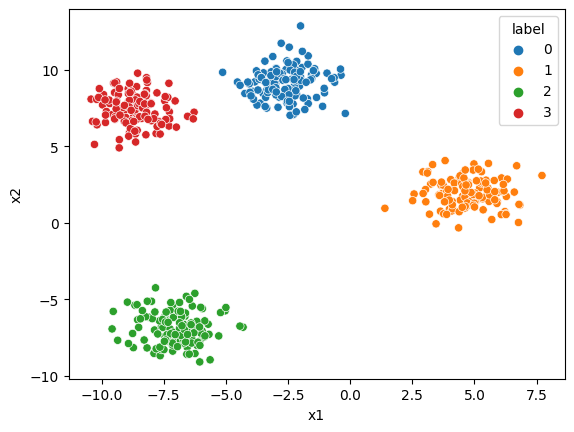

In [38]:
sns.scatterplot(df, x="x1", y="x2", hue="label", palette="tab10")

In [39]:
X = df.drop("label", axis=1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]


array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

<Axes: >

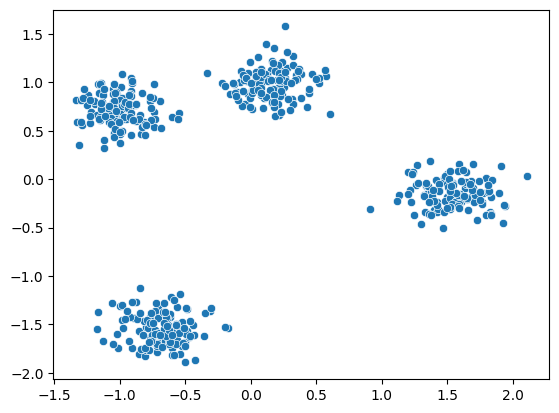

In [41]:
sns.scatterplot(x =scaled_X[:,0], y=scaled_X[:,1])

In [42]:
from sklearn.cluster import KMeans


clusters = range(1, 10)
sum_sqrd_dist = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_sqrd_dist

[999.9999999999992,
 546.9008463561437,
 116.09567852755526,
 28.786938978874005,
 26.06021587317813,
 23.656492197693538,
 21.09792041498022,
 19.375202991188004,
 16.64831921837848]

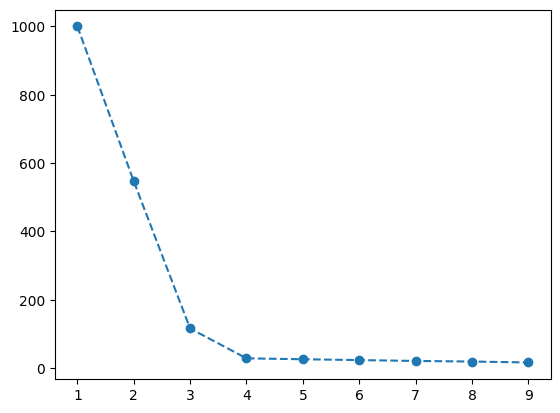

In [43]:
plt.plot(clusters, sum_sqrd_dist, "--o")

In [44]:
pd.Series(sum_sqrd_dist).diff()[1:]

1   -453.099154
2   -430.805168
3    -87.308740
4     -2.726723
5     -2.403724
6     -2.558572
7     -1.722717
8     -2.726884
dtype: float64

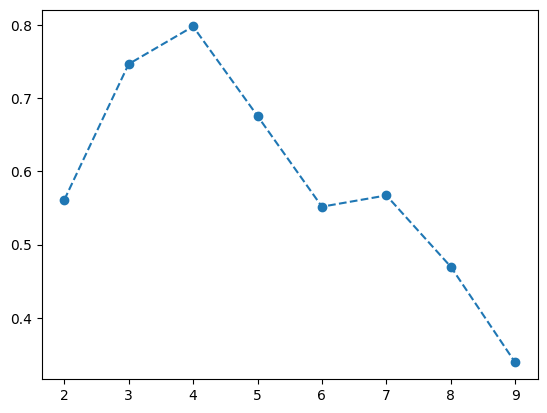

In [45]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

silhouette = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

plt.plot(clusters[1:], silhouette, "--o")

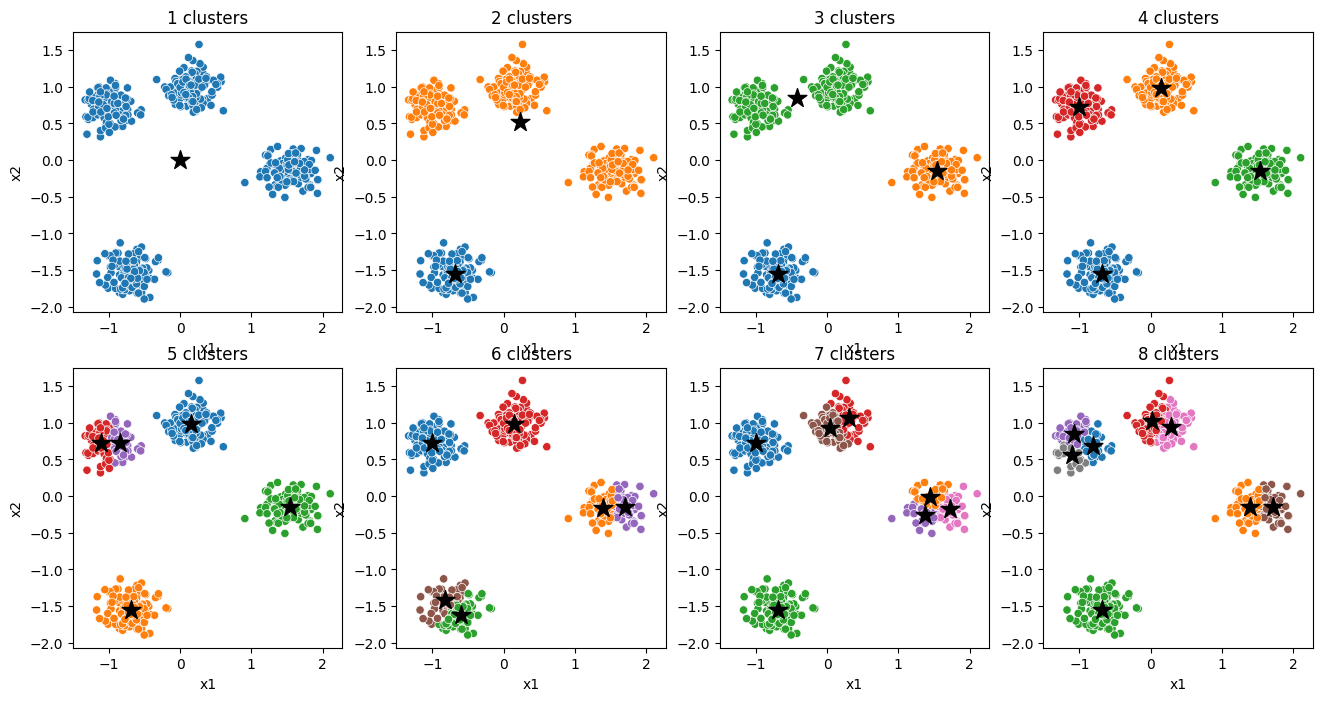

In [46]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black"
    )

    ax.legend([], [], frameon=False)

    ax.set(title = f"{i+1} clusters")
